<a href="https://colab.research.google.com/github/wheemin-2/25-1-ESAA/blob/main/0526_HW_TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **시계열 분석**

시계열 분석 : 시간에 따라 변하는 데이터를 사용하여 추이를 분석하는 것 (ex. 주가/환율 변동, 기온/습도 변화)
- 추세를 파악하거나 향후 전망 등을 예측하기 위한 용도로 시계열 분석을 사용
- 독립 변수로 시간을 사용하는 특성으로 인해 분석 방법에 일반적인 방법론들과 차이가 있음
- AR, MA ARMA, ARIMA 모형

[데이터 변동 유형에 따른 시계열 형태]
1. 불규칙 변동 : 시간에 따른 규칙적인 움직임과 달리 규칙성이 없어 예측이 불가능하고 우연적으로 발생하는 변동
2. 추세 변동 : 시계열 자료가 갖는 장기적인 변화 추세
3. 순환 변동 : 일정한 기간을 주기로 순환적으로 나타나는 변동
4. 계절 변동 : 계절적 영향과 사회적 관습에 따라 1년을 주기로 발생하는 것

# **AR, MA, ARMA, ARIMA**

## **AR 모델**
AR(AutoRegressive)(자기 회귀) 모델: 이전 관측 값이 이후 관측 값에 영향을 준다는 아이디어에 대한 모형

![AR](https://thebook.io/img/080289/fn2-2.jpg)

1) 시계열 데이터에서 현재 시점

2) 과거가 현재에 미치는 영향을 나타내는 모수에 시계열 데이터의 과거 시점을 곱한 것

3) 시계열 분석에서 오차 항 (=백색 잡음)

> *p* 시점을 기준으로 그 이전의 데이터에 의해 현재 시점의 데이터가 영향을 받는 모형

## **MA 모델**

MA(Moving Average)(이동 평균) 모델: 트렌드(평균 혹은 시계열 그래프에서 $y$ 값)가 변화하는 상황에 적합한 회귀 모델
- 시계열을 따라 윈도우 크기만큼 슬라이딩(moving)됨

![MA](https://thebook.io/img/080289/fn2-6.jpg)

1) 시계열 데이터에서 현재 시점

2) 매개변수$\theta$에 과거 시점의 오차를 곱한 것

3) 오차 항

> 이전 데이터의 오차에서 현재 데이터의 상태를 추론하겠다는 의미

## **ARMA 모델**

ARMA(AutoRegressive Moving Average)(자기 회귀 이동 평균) 모델: AR+MA 모델
 - AR, MA 두 가지 관점에서 과거의 데이터를 사용

![ARMA](https://thebook.io/img/080289/fn2-7.jpg)

## **ARIMA 모델**
ARIMA(AutoRegressive Integrated Moving Average)(자기 회귀 누적 이동 평균) 모델: 자기 회귀와 이동 평균을 둘 다 고려하는 모형
  - ARMA와 달리 과거 데이터의 선형 관계 + 추세(cointegration)까지 고려
1. `ARIMA(p,d,q)` 함수
    - p: 자기 회귀 차수
    - d: 차분 차수
    - q: 이동 평균 처수
2. `fit()` 메서드 : 모델에 데이터를 적용하여 훈련
3. `predict()` 메서드 : 미래의 추세 및 동향에 대해 예측

In [ ]:
! conda install -c conda-forge statsmodels

/bin/bash: line 1: conda: command not found


In [ ]:
! pip install statsmodels

In [ ]:
# 1. 저장소 전체를 clone
!git clone https://github.com/gilbutITbook/080289.git

# 2. 작업 디렉토리를 해당 폴더로 이동
%cd 080289/chap07/data/

# 3. 파일 목록 확인
!ls

Cloning into '080289'...
remote: Enumerating objects: 2278, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 2278 (delta 4), reused 27 (delta 3), pack-reused 2246 (from 1)
Receiving objects: 100% (2278/2278), 330.30 MiB | 17.71 MiB/s, done.
Resolving deltas: 100% (13/13), done.
Updating files: 100% (2591/2591), done.
/content/080289/chap07/data
sales.csv  SBUX.csv


<ipython-input-4-bcbb88f1a19b>:11: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = read_csv('/content/080289/chap07/data/sales.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -199.651
Date:                Fri, 30 May 2025   AIC                            411.302
Time:                        02:26:29   BIC                            420.634
Sample:                    01-01-1991   HQIC                           414.523
                         - 12-01-1993                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8788      0.227     -3.876      0.000      -1.323      -0.434
ar.L2         -0.2787      0.232     -1.203      0.229      -0.733       0.176
ar.L3         -0.0076      0.270     -0.028      0.9

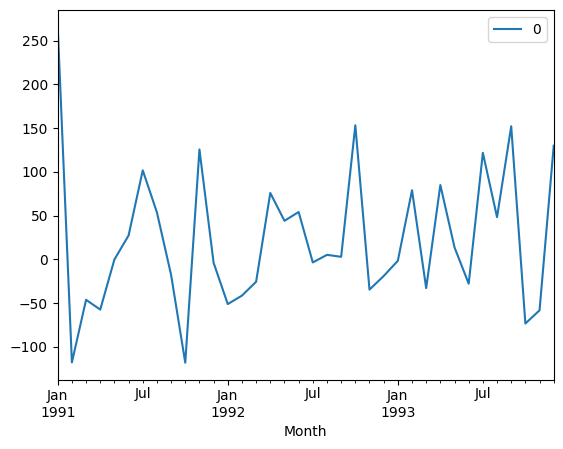

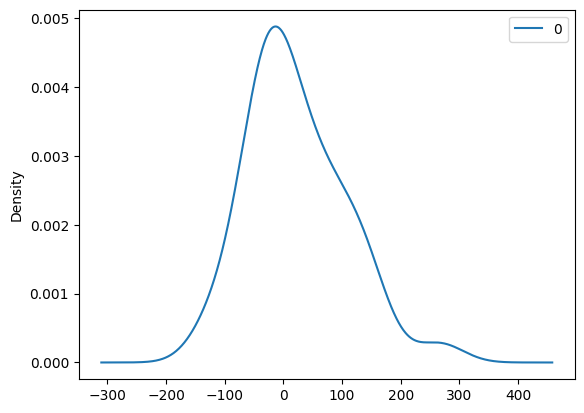

                0
count   36.000000
mean    22.459086
std     82.505331
min   -118.213281
25%    -33.308343
50%      1.361178
75%     76.704967
max    266.000000


In [ ]:
# ARIMA() 함수를 호출하여 sales 데이터셋에 대한 예측
from pandas import read_csv
from datetime import datetime
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot

def parser(x):
    return datetime.strptime('199'+x, '%Y-%m')   # strptime() : 날짜와 시간 정보를 문자열로 바꾸어 주는 메서드

df = read_csv('/content/080289/chap07/data/sales.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)
series = df.iloc[:, 0]  # squeeze 제거 → 첫 번째 열만 Series로 추출

model = ARIMA(series, order=(5, 1, 0))   # ARIMA() 함수 호출
model_fit = model.fit()   # 모형을 적용할 때 많은 디버그 정보가 제공되는데 disp 인수를 0으로 설정하여 이 기능을 비활성화
print(model_fit.summary())      # 모델에 정보 표시

residuals = DataFrame(model_fit.resid)

residuals.plot()   # residuals 정보를 시각적으로 표현
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

<ipython-input-5-e1f81babbd40>:12: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = read_csv('/content/080289/chap07/data/sales.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)


predicted=352.85534307, expected=346.30000000
predicted=277.39803580, expected=329.70000000
predicted=368.75373423, expected=445.40000000
predicted=331.77363464, expected=325.90000000
predicted=372.07040727, expected=449.30000000
predicted=360.02087230, expected=411.30000000
predicted=454.52622973, expected=417.40000000
predicted=388.69069931, expected=545.50000000
predicted=437.63244717, expected=477.60000000
predicted=516.43762369, expected=687.00000000
predicted=520.91619059, expected=435.30000000
predicted=675.59464689, expected=587.30000000
predicted=505.20101583, expected=676.90000000
Test MSE: 9118.818


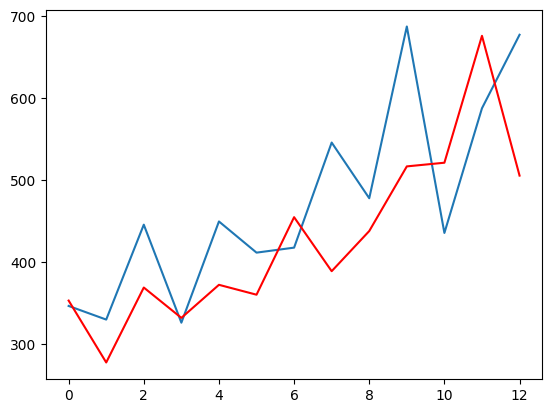

In [ ]:
# statsmodels 라이브러리를 이용한 sales 데이터셋 예측
import numpy as np
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

def parser(x):
    return datetime.strptime('199'+x, '%Y-%m')

df = read_csv('/content/080289/chap07/data/sales.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)
series = df.iloc[:, 0]

X = series.values
X = np.nan_to_num(X)
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]   # train과 test로 데이터셋 분리
history = [x for x in train]
predictions = list()

for t in range(len(test)):   # test 데이터셋의 길이(13)만큼 반복하여 수행
    model = ARIMA(history, order=(5, 1, 0))   # ARIMA() 함수 호출
    model_fit = model.fit()
    output = model_fit.forecast(steps=1)   # forecast() 메서드: 예측
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%.8f, expected=%.8f' % (yhat, obs))

error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()



---



# **순환 신경망(RNN)**

RNN (Recurrent Neural Network) : 시간적으로 연속성이 있는 데이터를 처리하기 위해 고안된 안공 신경망
- 'Recurrent' : 이전의 은닉층이 현재 은닉층의 입력이 되면서 반복되는 순환 구조를 갖는다는 의미
- '기억'을 갖는다는 점이 기존 네트워크와 다름
    - 기억 : 현재까지 입력 데이터를 요약한 정보
    - 새로운 입력이 네트워크로 들어올 때마다 기억은 조금씩 수정되고, 결국 최종적으로 남겨진 기억은 모든 입력 전체를 요약한 정보가 됨

![RNN](https://thebook.io/img/080289/368.jpg)

- x1 : 첫 번째 입력 > h1 (첫 번째 기억) 생성
- x2 : 두 번째 입력 + h1 > h2 (두 번째 기억)
    - h2 : 새롭게 업데이트 된 기억

[입력과 출력에 따른 RNN 유형]
1. 일대일 : 순환이 X (RNN이라고 말하기 어려움)
    - ex. 순방향 네트워크
2. 일대다 : 입력이 하나, 출력이 다수
    - ex. image captioning (이미지에 대한 설명을 문장으로 출력)
3. 다대일 : 입력이 다수, 출력이 하나
    - ex. 감성분석기



```
self.em = nn.Embedding(len(TEXT.vocab.stoi), embedding_dim)
self.rnn = nn.RNNCell(input_dim, hidden_size)
self.fc1 = nn.Linear(hidden_size, 256)
self.fc2 = nn.Linear(256,3)
```

![n:1](https://thebook.io/img/080289/369_1.jpg)

![n:1_1](https://thebook.io/img/080289/369_2.jpg)



4. 다대다 : 입력과 출력이 다수
    - ex. 자동 번역기

```
Seq2Seq(
  (encoder): Encoder(
    (embedding): Embedding(7855, 256)
    (rnn): LSTM(256, 512, num_layers=2, dropout=0.5)
    (dropout): Dropout(p=0.5, inplace=False)
  )
  (decoder): Decoder(
    (embedding): Embedding(5893, 256)
    (rnn): LSTM(256, 512, num_layers=2, dropout=0.5)
    (fc_out): Linear(in_features=512, out_features=5893, bias=True)
    (dropout): Dropout(p=0.5, inplace=False)
  )
)

```
![n:n](https://thebook.io/img/080289/370_1.jpg)

5. 동기화 다대다 : 입력과 출력이 다수
    - ex. 문장에서 다음에 나올 단어를 예측하는 언어 모델

![total](https://thebook.io/img/080289/370_2.jpg)

## **RNN 계층과 셀**
- RNN은 내장된(built-in) 계층뿐만 아니라 셀 레벨의 API 제공
- RNN 계층은 입력된 배치 순서대로 모두 처리
- RNN 셀은 오직 하나의 단계만 처리: for loop 구문
  - nn.RNNCell: SimpleRNN 계층에 대응되는 RNN 셀
  - nn.GRUCell: GRU 계층에 대응되는 GRU 셀
  - nn.LSTMCell: LSTM 계층에 대응되는 LSTM 셀
- 파이토치에서 RNN의 계층과 셀을 분리해서 구현

![rnn_layer](https://thebook.io/img/080289/371.jpg)






---



# RNN 실습

## **1. 문자 단위 RNN(Char RNN)**
- 필요 도구 임포트

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

**1. 훈련 데이터 전처리하기**
- 입력 데이터와 레이블 데이터에 대해 문자 집합(vocabulary) 만듦
  - 문자 집합: 중복을 제거한 문자들의 집합

In [ ]:
input_str = 'apple'
label_str = 'pple!'
char_vocab = sorted(list(set(input_str+label_str)))
vocab_size = len(char_vocab)
print ('문자 집합의 크기 : {}'.format(vocab_size))

문자 집합의 크기 : 5


In [ ]:
input_size = vocab_size   # 입력의 크기는 문자 집합의 크기
hidden_size = 5
output_size = 5
learning_rate = 0.1

In [ ]:
char_to_index = dict((c, i) for i, c in enumerate(char_vocab)) # 문자에 고유한 정수 인덱스 부여
print(char_to_index)

{'!': 0, 'a': 1, 'e': 2, 'l': 3, 'p': 4}


In [ ]:
# 정수로부터 문자를 얻을 수 있는 index_to_char 생성
index_to_char={}
for key, value in char_to_index.items():
    index_to_char[value] = key
print(index_to_char)

{0: '!', 1: 'a', 2: 'e', 3: 'l', 4: 'p'}


In [ ]:
# 입력 데이터와 레이블 데이터 각 문자들을 정수로 맵핑
x_data = [char_to_index[c] for c in input_str]
y_data = [char_to_index[c] for c in label_str]
print(x_data)
print(y_data)

[1, 4, 4, 3, 2]
[4, 4, 3, 2, 0]


In [ ]:
# 배치 차원 추가
# 텐서 연산인 unsqueeze(0)를 통해 해결할 수도 있었음
x_data = [x_data]
y_data = [y_data]
print(x_data)
print(y_data)

[[1, 4, 4, 3, 2]]
[[4, 4, 3, 2, 0]]


In [ ]:
# 입력 시퀀스 각 문자 원-핫 벡터 변환
x_one_hot = [np.eye(vocab_size)[x] for x in x_data]
print(x_one_hot)

[array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.]])]


In [ ]:
# 입력 데이터 레이블 데이터 텐서로 변환
X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data)

<ipython-input-14-0d017e108e54>:2: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  X = torch.FloatTensor(x_one_hot)


In [ ]:
# 각 텐서의 크기 확인
print('훈련 데이터의 크기 : {}'.format(X.shape))
print('레이블의 크기 : {}'.format(Y.shape))

훈련 데이터의 크기 : torch.Size([1, 5, 5])
레이블의 크기 : torch.Size([1, 5])


**2. 모델 구현하기**
- RNN 모델 구현

In [ ]:
# fc: 완전 연결층(fully-connected layer)
class Net(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Net, self).__init__()
        self.rnn = torch.nn.RNN(input_size, hidden_size, batch_first=True) # RNN 셀 구현
        self.fc = torch.nn.Linear(hidden_size, output_size, bias=True) # 출력층 구현

    def forward(self, x): # 구현한 RNN 셀과 출력층을 연결
        x, _status = self.rnn(x)
        x = self.fc(x)
        return x

In [ ]:
# 클래스로 정의한 모델 저장
net = Net(input_size, hidden_size, output_size)

In [ ]:
# 출력 크기 확인
outputs = net(X)
print(outputs.shape) # 3차원 텐서

torch.Size([1, 5, 5])


In [ ]:
print(outputs.view(-1, input_size).shape) # 2차원 텐서로 변환

torch.Size([5, 5])


In [ ]:
# 레이블 데이터 크기
print(Y.shape)
print(Y.view(-1).shape)

torch.Size([1, 5])
torch.Size([5])


In [ ]:
# 옵티마이저, 손실 함수 정의
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), learning_rate)

In [ ]:
for i in range(100):
    optimizer.zero_grad()
    outputs = net(X)
    loss = criterion(outputs.view(-1, input_size), Y.view(-1)) # view를 하는 이유는 Batch 차원 제거를 위해
    loss.backward() # 기울기 계산
    optimizer.step() # 아까 optimizer 선언 시 넣어둔 파라미터 업데이트

    # 아래 세 줄은 모델이 실제 어떻게 예측했는지를 확인하기 위한 코드.
    result = outputs.data.numpy().argmax(axis=2) # 최종 예측값인 각 time-step 별 5차원 벡터에 대해서 가장 높은 값의 인덱스를 선택
    result_str = ''.join([index_to_char[c] for c in np.squeeze(result)])
    print(i, "loss: ", loss.item(), "prediction: ", result, "true Y: ", y_data, "prediction str: ", result_str)

0 loss:  1.501065969467163 prediction:  [[4 3 3 3 3]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pllll
1 loss:  1.2946637868881226 prediction:  [[4 4 4 2 4]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pppep
2 loss:  1.1754817962646484 prediction:  [[4 4 4 2 4]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pppep
3 loss:  1.0190250873565674 prediction:  [[4 4 4 2 4]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pppep
4 loss:  0.8418864011764526 prediction:  [[4 4 4 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pppe!
5 loss:  0.6792694926261902 prediction:  [[4 4 3 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pple!
6 loss:  0.537882924079895 prediction:  [[4 4 3 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pple!
7 loss:  0.4191437363624573 prediction:  [[4 4 3 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pple!
8 loss:  0.32324832677841187 prediction:  [[4 4 3 2 0]] true Y:  [[4, 4, 3, 2, 0]] prediction str:  pple!
9 loss:  0.25072988867759705 prediction:  [[4 4 3 2 0]] 

## **2. 더 많은 데이터로 학습한 문자 단위 RNN(Char RNN)**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

**1. 훈련 데이터 전처리하기**

In [ ]:
sentence = ("if you want to build a ship, don't drum up people together to "
            "collect wood and don't assign them tasks and work, but rather "
            "teach them to long for the endless immensity of the sea.")

문자 집합을 생성, 각 문자에 고유한 정수 부여

In [ ]:
char_set = list(set(sentence)) # 중복을 제거한 문자 집합 생성
char_dic = {c: i for i, c in enumerate(char_set)} # 각 문자에 정수 인코딩

In [ ]:
print(char_dic) # 공백도 여기서는 하나의 원소

{'t': 0, 'h': 1, "'": 2, 'r': 3, 'w': 4, 'e': 5, 'n': 6, 'f': 7, '.': 8, 'u': 9, 'i': 10, 'c': 11, 's': 12, ',': 13, 'l': 14, 'k': 15, 'o': 16, 'b': 17, 'a': 18, 'd': 19, 'g': 20, ' ': 21, 'm': 22, 'y': 23, 'p': 24}


In [ ]:
dic_size = len(char_dic)
print('문자 집합의 크기 : {}'.format(dic_size))

문자 집합의 크기 : 25


In [ ]:
# 하이퍼파라미터 설정
hidden_size = dic_size
sequence_length = 10  # 임의 숫자 지정
learning_rate = 0.1

In [ ]:
# 데이터 구성
x_data = []
y_data = []

for i in range(0, len(sentence) - sequence_length):
    x_str = sentence[i:i + sequence_length]
    y_str = sentence[i + 1: i + sequence_length + 1]
    print(i, x_str, '->', y_str)

    x_data.append([char_dic[c] for c in x_str])  # x str to index
    y_data.append([char_dic[c] for c in y_str])  # y str to index

0 if you wan -> f you want
1 f you want ->  you want 
2  you want  -> you want t
3 you want t -> ou want to
4 ou want to -> u want to 
5 u want to  ->  want to b
6  want to b -> want to bu
7 want to bu -> ant to bui
8 ant to bui -> nt to buil
9 nt to buil -> t to build
10 t to build ->  to build 
11  to build  -> to build a
12 to build a -> o build a 
13 o build a  ->  build a s
14  build a s -> build a sh
15 build a sh -> uild a shi
16 uild a shi -> ild a ship
17 ild a ship -> ld a ship,
18 ld a ship, -> d a ship, 
19 d a ship,  ->  a ship, d
20  a ship, d -> a ship, do
21 a ship, do ->  ship, don
22  ship, don -> ship, don'
23 ship, don' -> hip, don't
24 hip, don't -> ip, don't 
25 ip, don't  -> p, don't d
26 p, don't d -> , don't dr
27 , don't dr ->  don't dru
28  don't dru -> don't drum
29 don't drum -> on't drum 
30 on't drum  -> n't drum u
31 n't drum u -> 't drum up
32 't drum up -> t drum up 
33 t drum up  ->  drum up p
34  drum up p -> drum up pe
35 drum up pe -> rum up peo
36

In [ ]:
print(x_data[0])
print(y_data[0])

[10, 7, 21, 23, 16, 9, 21, 4, 18, 6]
[7, 21, 23, 16, 9, 21, 4, 18, 6, 0]


In [ ]:
# 입력 데이터, 레이블 데이터 텐서로 변환
x_one_hot = [np.eye(dic_size)[x] for x in x_data] # x 데이터는 원-핫 인코딩
X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data)

In [ ]:
print('훈련 데이터의 크기 : {}'.format(X.shape))
print('레이블의 크기 : {}'.format(Y.shape))

훈련 데이터의 크기 : torch.Size([170, 10, 25])
레이블의 크기 : torch.Size([170, 10])


In [ ]:
# 원-핫 인코딩 결과 확인
print(X[0])

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [ ]:
# 레이블 데이터 첫번째 샘플 출력
print(Y[0])

tensor([ 7, 21, 23, 16,  9, 21,  4, 18,  6,  0])


**2. 모델 구현**
- RNN과 거의 동일하나 은닉층을 두개 쌓음

In [ ]:
class Net(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, layers): # 현재 hidden_size는 dic_size와 같음.
        super(Net, self).__init__()
        self.rnn = torch.nn.RNN(input_dim, hidden_dim, num_layers=layers, batch_first=True)
        self.fc = torch.nn.Linear(hidden_dim, hidden_dim, bias=True)

    def forward(self, x):
        x, _status = self.rnn(x)
        x = self.fc(x)
        return x

In [ ]:
net = Net(dic_size, hidden_size, 2) # 층 2개

In [ ]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), learning_rate)

In [ ]:
outputs = net(X)
print(outputs.shape) # 3차원 텐서

torch.Size([170, 10, 25])


In [ ]:
print(outputs.view(-1, dic_size).shape) # 2차원 텐서로 변환.

torch.Size([1700, 25])


In [ ]:
# 레이블 데이터의 크기 학인
print(Y.shape)
print(Y.view(-1).shape)

torch.Size([170, 10])
torch.Size([1700])


In [ ]:
for i in range(100):
    optimizer.zero_grad()
    outputs = net(X) # (170, 10, 25) 크기를 가진 텐서를 매 에포크마다 모델의 입력으로 사용
    loss = criterion(outputs.view(-1, dic_size), Y.view(-1))
    loss.backward()
    optimizer.step()

    # results의 텐서 크기는 (170, 10)
    results = outputs.argmax(dim=2)
    predict_str = ""
    for j, result in enumerate(results):
        if j == 0: # 처음에는 예측 결과를 전부 가져오지만
            predict_str += ''.join([char_set[t] for t in result])
        else: # 그 다음에는 마지막 글자만 반복 추가
            predict_str += char_set[result[-1]]

    print(predict_str)

uuuuuuuuuuuuuuuuuuuuuuuuuu'uuuuuuuuuuuuuuuu'uuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuouuuuuuuuuuu
    o  mo   oo  o o omo o    o    o      o o  o  moo  mo  m o  mo  o  oo   mo   o   o o o   o   o o o o o   o   o o o   o  m o o   o  m o o o   o  mo  moo  mooo     o  o o     mm 
                        o                                                                                         o t                     o                                        
  t'ols a'olo'rl o'oll'pop.'dlnp '.'ope'olnl'orol'oll 'nrllo.'npolollrl''llo'ol ''nln'opo'orol'llor.lpo'olnll's n'ols's'o'ororonpn'o'oll'rlpololo.l ''nle'oln.lll.oolll '.olll'nll'
  tot toe'ttoo ttolkttot ttotosktototttr ttttttkttttttotattto ttto ttsot'tttd tho.tta tttokttttttoo ttttttttt ttalttoot tt tht tttottttts'tttttoa thomttto ttottt tottttdtktttlttto
e toe donl ohn hn  lohd ernnnn  n tnh nd ndnt nnonhenn ed thnrnnrntohdhn nthnlthhldht h nd nhn nthn 